# ELE 435/535 Computational Lab 4

### Due Date: 10/15/2018 (Monday) 11:59 PM
### Name:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  ** Regression

### Q1) Housing Dataset:

In this part, we will be working with a dataset that contains house prices in suburbs of Boston. The data contains 14 columns, the first 13 of which correspond to different housing-related features , such as "CRIM" (crime rate per capita), "RM" (average number of rooms), "TAX" (tax rate), etc. A more comprehensive description can be found at https://archive.ics.uci.edu/ml/datasets/Housing. The last column corresponds to  median value of owner-occupied homes in $1000's. 

1-1) Using linear regression, find a vector "w" that specifies a weighting of each attribute for predicting the price of a house (median value in $1000's, similar to the last column of data). Print vector w.

In [2]:
housing_data = np.loadtxt('housing.data')
X = np.matrix(housing_data[:,0:13])
y = np.matrix(housing_data[:,13]).T

In [3]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[[-9.28965170e-02]
 [ 4.87149552e-02]
 [-4.05997958e-03]
 [ 2.85399882e+00]
 [-2.86843637e+00]
 [ 5.92814778e+00]
 [-7.26933458e-03]
 [-9.68514157e-01]
 [ 1.71151128e-01]
 [-9.39621540e-03]
 [-3.92190926e-01]
 [ 1.49056102e-02]
 [-4.16304471e-01]]


1-2) Using vector w from the previous part, print the mean squared error of predicting house prices.

In [4]:
mse = np.linalg.norm(X @ w - y, 2) / X.shape[0]
print(mse)

0.21853853112261515


### Q2) Physicochemical Properties of Protein Tertiary Structure Data Set:

In this part, we will be working with a new dataset that quantifies protein tertiary structure.
There are 45730 decoys with size varying from 0 to 21 angstrom. Each example contains 9 features. More information can be found at https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure#. 

First, we will import data into numpy using the following code. Afterwads, data is split into trainingg/test sets. 
The goal is to learn a vector "w" (using linear regression on the training data) to predict the size of a test-decoy based on its 9 features. 

In [5]:
Protein_data = np.loadtxt('Protein.txt')
train_X = np.matrix(Protein_data[0:40000,1:]) # Dictionary that contains features for training samples
train_y = np.matrix(Protein_data[0:40000,0]).T # Size of decoy for each training sample (a real number)

test_X = np.matrix(Protein_data[40000:,1:]) # Dictionary that contains features for test samples
test_y = np.matrix(Protein_data[40000:,0]).T # Size of decoy for each test sample (a real number)

Q2-1) Based on train_X and train_y, find the corresponding vector "w" (using linear regression) and print it.

In [6]:
w = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y

Q2-2) Using vector "w" from the previous part, predict the size of decoys for test samples (test_X). What is the mean squared error between the predicted values and the actual sizes (train_y)?

In [7]:
mse = np.linalg.norm(test_X @ w - test_y, 2) / test_X.shape[0]
print(mse)

0.06866226709480652


### Q3) Understanding Overfitting:

In this part, we will work on an example that helps us understand the problems with overfitting. 
First, we will pick 10 samples of a sin wave using the following commands.

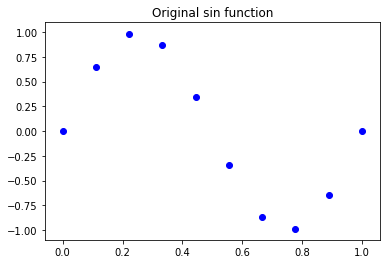

In [8]:
Num_points = 10
x = np.linspace(0, 1, Num_points)
signal = np.sin(2*np.pi*x)
plt.figure()
plt.scatter(x, signal, color = (0,0,1))
plt.title('Original sin function')
plt.show()

Then, we are going to add Gaussian noise to the original samples.

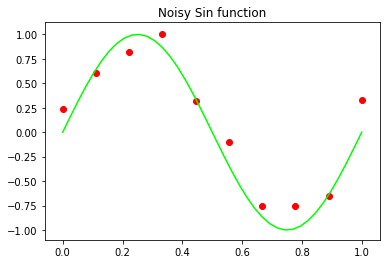

In [9]:
sigma = 0.15
mu = 0.1
noise = sigma * np.random.randn(Num_points) + mu
corrupt_signal = signal + noise

plt.figure()
plt.scatter(x, corrupt_signal, color = (1,0,0))
plt.plot(np.linspace(0, 1, Num_points*4),np.sin(2*np.pi*(np.linspace(0, 1, Num_points*4)))
         ,color=(0,1,0))
plt.title('Noisy Sin function')
plt.show()

Now, using regression, fit polynomials of different degrees (degree=0 up to degree=9) to the noisy samples (noisy samples come from "corrupt_signal" in the code above). Plot the corresponding polynomials along with the original sin function (10 different plots, in total). Describe what happens as you fit a more complex polynomial to your data.

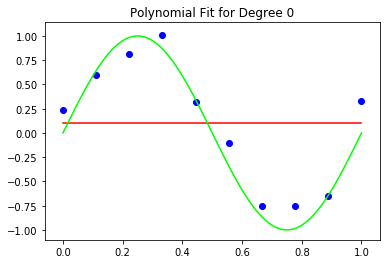

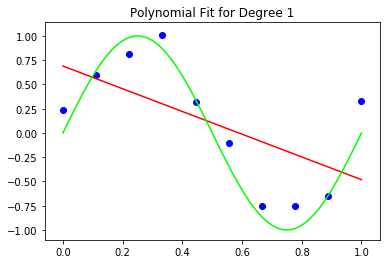

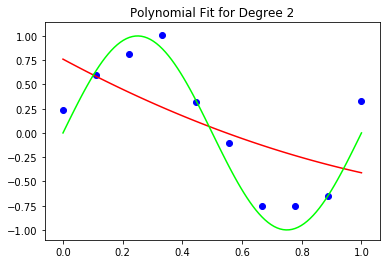

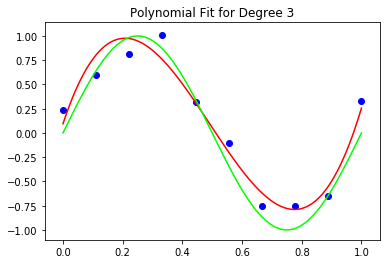

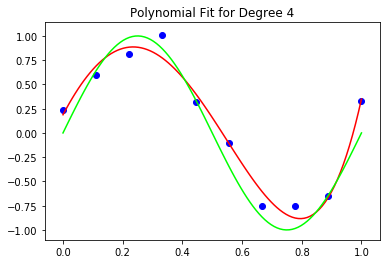

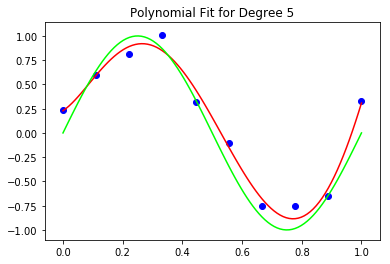

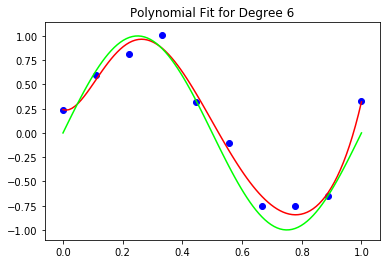

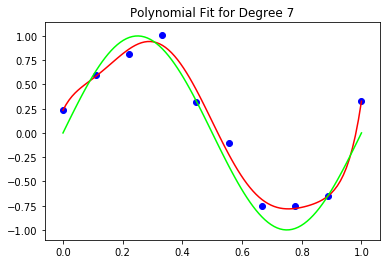

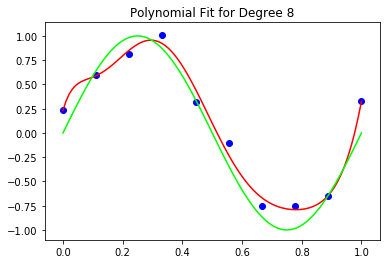

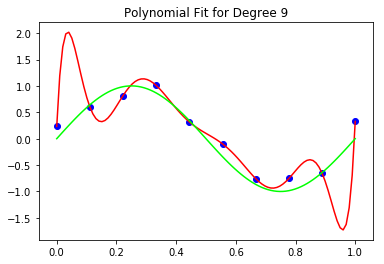

What occurs is that the first 4 or 5 degree polynomial fits are quite reasonable. That is, they are roughly the same polynomials of the Taylor series approximation. However, after degree 5, the number of degrees is roughly equal to the number of points and you see overfitting. This is especially apparent in degree=9 where the number of coefficients equals the number of points. Thus the polynomial fits the points perfectly but not the sinusoid from which the data was generated.


In [10]:
for d in range(10):
    
    # Make Vandermonde matrix
    vm = np.empty((Num_points, d+1))
    for i in range(Num_points):
        for j in range(d+1):
            vm[i, j] = x[i]**j
            
    coeffs = np.linalg.inv(vm.T @ vm) @ vm.T @ corrupt_signal
    
    poly = []
    for i in np.linspace(0, 1, Num_points*10):
        point = 0
        for j in range(len(coeffs)):
            point += coeffs[j]*(i**j)
            
        poly.append(point)
    
    plt.plot(np.linspace(0, 1, Num_points*10), poly, color=(1,0,0))
    plt.plot(np.linspace(0, 1, Num_points*10),np.sin(2*np.pi*(np.linspace(0, 1, Num_points*10))), color=(0,1,0))
    plt.scatter(x, corrupt_signal, color = (0,0,1))
    plt.title('Polynomial Fit for Degree ' + str(d))
    plt.show()
    
print('What occurs is that the first 4 or 5 degree polynomial fits are quite reasonable. That is, they are roughly the same polynomials of the Taylor series approximation. However, after degree 5, the number of degrees is roughly equal to the number of points and you see overfitting. This is especially apparent in degree=9 where the number of coefficients equals the number of points. Thus the polynomial fits the points perfectly but not the sinusoid from which the data was generated.')

### Q4) Collaborative Representation Based Classification:

The goal of this part is to use regression for classifiying data. We will be working with the subset of MNIST that was used for HW1. The training data contains 10,000 samples of different digits. Let's call it matrix D (of dimension 784 * 10000). The first 1000 columns of D correspond to digit 0 ($D_0$), the next 1000 correspond to digit 1 ($D_1$), etc. 

Now, given any new example (x), we would like to represent it as a linear combination of columns of D (hence, the name representation based classification). This can be acheived by finding a vector w (of dimension 10,000) that satisfies; $w = \arg\min \hspace{2mm} \|Dw - x \|_2$.
The first 1000 elements of w ($w_0$) quantify how much of each column from digit 0 are needed to represent x. Similarly, the next 1000 elements ($w_1$) correspond to weights on $D_1$, etc.
(Hint: Getting w directly from normal equation of D is time-consuming, SVD will help to speed up the calculation)

Next, prediction of pixel values of any test image (x) based only on examples of a particual digit $i$ can be found using $y_i' = D_i \times w_i$. Then, k-th digit that yields the lowest mean squared prediction error (i.e., $k = \arg\min \hspace{2mm} \|y -y'_i \|_2$) will determine the label of x. 


Follow the procedure above to predict the labels of each test example. What is the corresponding testing accuracy?

In [11]:
# Regression-based classification
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='float64')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='float64')

train_data = train_data/255.0
test_data = test_data/255.0


In [12]:
# Not sure what is being done incorrectly. The classifier predicts 8 the vast majority of the time and 9 sometimes.
# This is due to the fact that the difference in the vast majority of the pixels in the blackspace is smaller
# than the other digits

num_correct = 0

reg_mat = np.linalg.inv(train_data.T @ train_data) @ train_data.T

print('Collaborative Representation Classification')

for i in range(test_data.shape[1]):
    test = test_data[:, i]
    w = reg_mat @ test
    
    y_i = []
    for j in range(10):
        y_i.append(train_data[:, j*1000:(j+1)*1000] @ w[j*1000:(j+1)*1000])
    
    prediction = 0
    error = np.linalg.norm(y_i[0] - test, 2)
    
    for j in range(1, 10):
        if np.linalg.norm(y_i[j] - test, 2) < error:
            prediction = j
            error = np.linalg.norm(y_i[j] - test, 2)
            
    
    if prediction == i // 100:
        num_correct += 1
        
print('Accuracy: ' + str(num_correct/test_data.shape[1]))

print('Collaborative Representation Classification with Scaling')

num_correct = 0

for i in range(test_data.shape[1]):
    test = test_data[:, i]
    w = reg_mat @ test
    
    y_i = []
    for j in range(10):
        y_i.append(train_data[:, j*1000:(j+1)*1000] @ w[j*1000:(j+1)*1000])
    
    prediction = 0
    error = np.linalg.norm(y_i[0] - test, 2)/np.linalg.norm(w[0:1000])
    
    for j in range(1, 10):
        if np.linalg.norm(y_i[j] - test, 2) < error:
            prediction = j
            error = np.linalg.norm(y_i[j] - test, 2)/np.linalg.norm(w[j*1000:(j+1)*1000])
            
    
    if prediction == i // 100:
        num_correct += 1
        
print('Accuracy: ' + str(num_correct/test_data.shape[1]))

Collaborative Representation Classification
Accuracy: 0.139
Collaborative Representation Classification with Scaling
Accuracy: 0.1
